In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [11]:
tempDF=pd.read_csv('C:\KDT\데이터분석\DAY01\daegu-utf8.csv',encoding='utf-8-sig')

- 화면에서 측정할 달을 입력 받아서 진행
- 해당 기간 동안 최고기온 평균값 및 최저기온 평균값 계산
    - 최고기온 및 최저기온 데이터를 이용하여 입력된 달의 각각 평균값을 구함
    - 문자열 형태의 ‘날짜’ 열의 데이터는 datetime 으로 변경함:
- 하나의 그래프 안에 2개의 꺾은선 그래프로 결과를 출력
    - 마이너스 기호 출력 깨짐 방지
    - 입력된 월을 이용하여 그래프의 타이틀 내용 변경
    - 최고 온도는 빨간색, 최저 온도는 파란색으로 표시하고 각각 마커 및 legend를 표시

In [12]:
tempDF.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1909-01-01,143.0,-4.1,-8.0,0.1
1,1909-01-02,143.0,-0.8,-6.7,6.1
2,1909-01-03,143.0,1.0,-2.4,3.6
3,1909-01-04,143.0,4.2,0.0,9.2
4,1909-01-05,143.0,3.4,-0.4,9.0


In [13]:
tempDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42180 entries, 0 to 42179
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      42180 non-null  object 
 1   지점      42180 non-null  float64
 2   평균기온    42180 non-null  float64
 3   최저기온    42180 non-null  float64
 4   최고기온    42180 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.6+ MB


In [14]:
# 날짜를 datetime으로 변경
tempDF['날짜']=pd.to_datetime(tempDF['날짜'])

In [15]:
# 시작,종료 연도 , 달
# 최고기온평균 도출
def high_temp_av(start_year,end_year,mon):
    subDF=tempDF[(start_year<=tempDF['날짜'].dt.year)&
                 (tempDF['날짜'].dt.year<=end_year)&
                 (tempDF['날짜'].dt.month==mon)]
    high_degree=[]
    year=start_year
    while year<=end_year:
        subDF_year=subDF[subDF['날짜'].dt.year==year]
        high_degree.append(round(subDF_year['최고기온'].sum()/subDF_year['최고기온'].count(),1))
        year+=1
    return high_degree

In [16]:
# 시작,종료 연도 , 달
# 최저기온평균 도출
def low_temp_av(start_year,end_year,mon):
    subDF=tempDF[(start_year<=tempDF['날짜'].dt.year)&
                 (tempDF['날짜'].dt.year<=end_year)&
                 (tempDF['날짜'].dt.month==mon)]
    low_degree=[]
    year=start_year
    while year<=end_year:
        subDF_year=subDF[subDF['날짜'].dt.year==year]
        low_degree.append(round(subDF_year['최저기온'].sum()/subDF_year['최저기온'].count(),1))
        year+=1
    return low_degree

In [17]:
# 최고기온 최저기온 그래프 그리기
# 입력된 월을 이용해 타이틀 내용 변경 => 연도두개 월 입력 필요
# 최고 빨간색. 최저 파란색
def plot(start_year,end_year,month):
    plt.figure(figsize=(20,5))
    plt.plot(range(start_year,end_year+1),low_temp_av(start_year,end_year,month),'blue',marker='o',label='최저기온')
    plt.plot(range(start_year,end_year+1),high_temp_av(start_year,end_year,month),'red',marker='o',label='최고기온')
    plt.title(f'{start_year}년 부터 {end_year}년 까지 {month}월의 기온 변화')
    plt.legend()

In [18]:
#측정할 기간 입력 받기
start_year=int(input('시작 연도를 입력하세요.:'))
end_year=int(input('마지막 연도를 입력하세요.:'))
inp_month=int(input('기온 변화를 측정할 달을 입력하세요.:'))

8 최저기온 평균:
[22.9, 24.3, 24.2, 22.2, 22.2, 25.0, 23.1, 24.5, 25.0, 21.7, 22.0]
8 최고기온 평균:
[31.0, 33.3, 32.0, 30.7, 29.7, 33.6, 30.3, 32.4, 34.4, 28.8, 31.2]


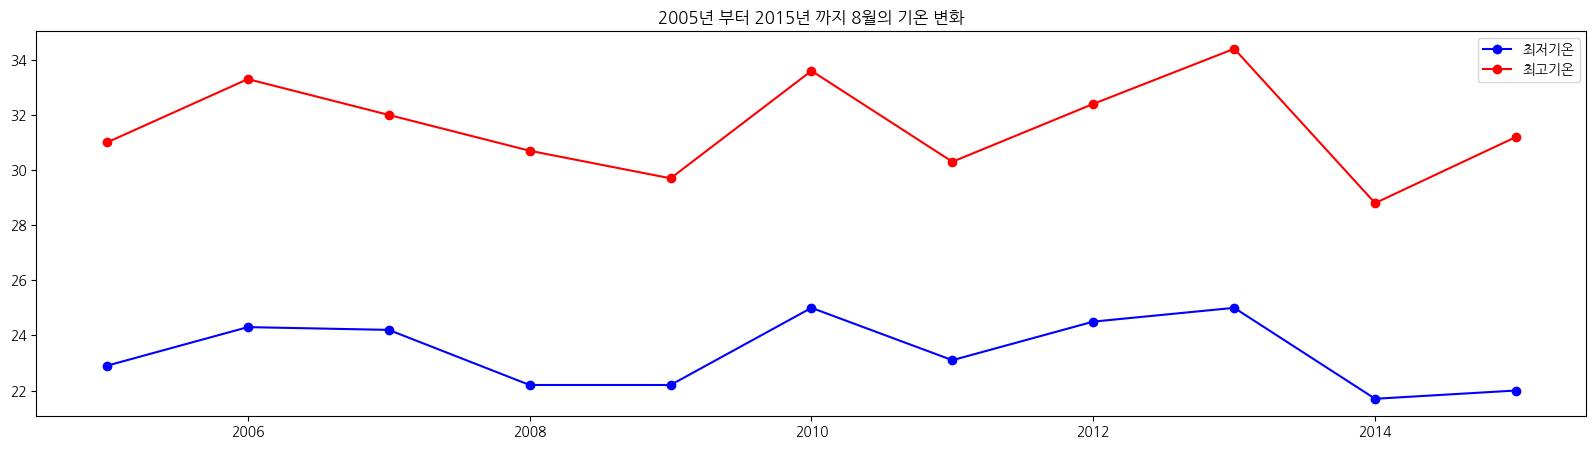

In [19]:
print(f'{inp_month} 최저기온 평균:',low_temp_av(start_year,end_year,inp_month),sep='\n')
print(f'{inp_month} 최고기온 평균:',high_temp_av(start_year,end_year,inp_month),sep='\n')
plot(start_year,end_year,inp_month)